In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


# LOAD THE DATA

In [3]:
batch_size=128  #if the entire data set is batched ,then it wont take much time to train bcz 60,000 dataset are there
num__classes=10
epochs=20
#the data,split between traina nd tests sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# EDA 
Expeditary data analysis

data shape is printed below:handwritten images of range 0 to 9

60,000 training data and 10,000 test samples

28*28 grayscale image


In [4]:
print('Training data shape:{0} {1}'.format(x_train.shape,y_train.shape))
print('Testing data shape:',x_test.shape,y_test.shape)
print('-'*55)

#find the unique numbers from the train labels
classes=np.unique(y_train)# the unique values in the training set is found
nclasses=len(classes)# there are 10 unique values
print('total number of outputs', nclasses)
print('output classes', classes)


Training data shape:(60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
-------------------------------------------------------
total number of outputs 10
output classes [0 1 2 3 4 5 6 7 8 9]


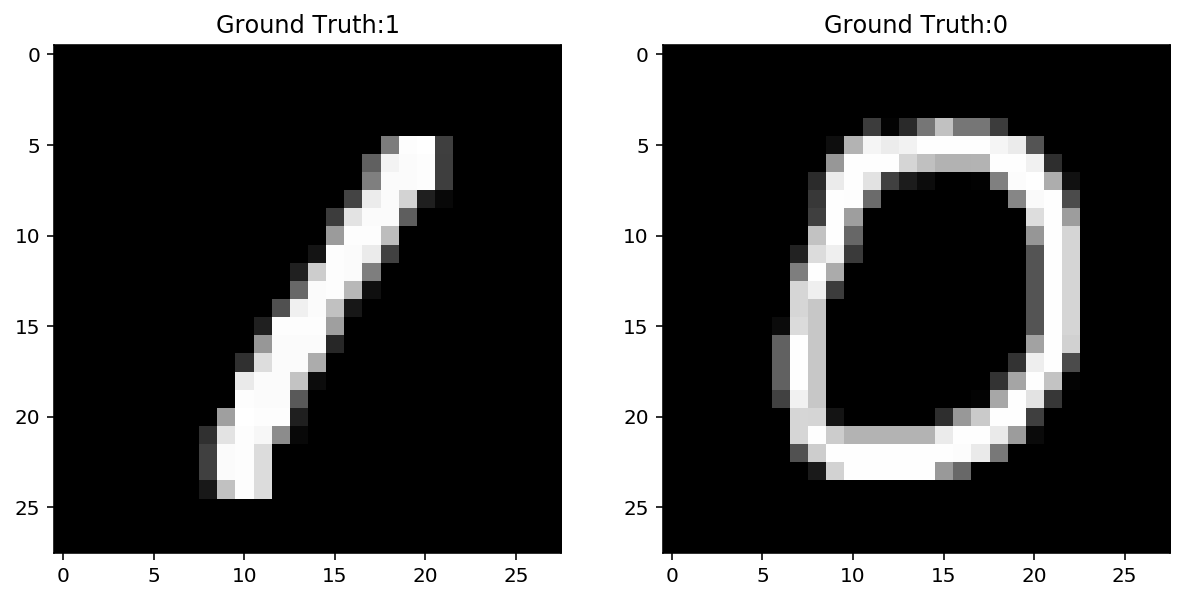

In [5]:
plt.figure(figsize=[10,5])
#display the image in training data
plt.subplot(121)
plt.imshow(x_train[3,:,:],cmap='gray')
plt.title("Ground Truth:{}".format(y_train[3]))


#display the image in training data
plt.subplot(122)
plt.imshow(x_test[10,:,:],cmap='gray')
plt.title("Ground Truth:{}".format(y_test[10]))
plt.show()

# process the data


In [6]:
#change from matrix to array for the dimension matching and processing
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)


convert the datda to float and scale the value between [0,1]

In [7]:
#change to float datta type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#scale the image to lie between [1 and 0]
x_train/=255
print(x_train.shape[0],'Train samples')
print('Training samples are\n',y_train)
x_test/=255
print(x_test.shape[0],'Test samples')
print('Test samples are\n',y_test)


60000 Train samples
Training samples are
 [5 0 4 ... 5 6 8]
10000 Test samples
Test samples are
 [7 2 1 ... 4 5 6]


#### one hot encoding

In [8]:
print('orginal label 0:',y_train[0])
#convert  class vectors to binary class metrices
y_train=keras.utils.to_categorical(y_train,num__classes)
y_test=keras.utils.to_categorical(y_test,num__classes)

#display the change for category label using onecode encoding
print('After the conversion to categorical (one-hot):',y_train[0])

orginal label 0: 5
After the conversion to categorical (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#to define model

In [10]:
model=Sequential()#type of neural network
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num__classes,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [11]:
#configure n/w

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
#verbose=0----> will not print the details it will run in background,ecpoch and batchsize are defined;batchsize is used insted of sochastic gardient and normally using the gradient methods on entire data
#train and test accuracy must match,so plot accurcy for the trainikg and see the matching

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 450us/step - loss: 0.2472 - acc: 0.9243 - val_loss: 0.1014 - val_acc: 0.9683
Epoch 2/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1039 - acc: 0.9684 - val_loss: 0.0962 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 30s 500us/step - loss: 0.0747 - acc: 0.9781 - val_loss: 0.0740 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 28s 458us/step - loss: 0.0619 - acc: 0.9813 - val_loss: 0.0704 - val_acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 30s 495us/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0820 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.0446 - acc: 0.9867 - val_loss: 0.0817 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 25s 422us/

In [14]:
#eveluvate the trained model

In [15]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('test acurracy',score[1])

Test loss: 0.10658526793141332
test acurracy 0.9841


### Check for Overfitting
#check for overfitting
#to avoid the over learning ,which cannot be generalize
#regularization is required ,dropout--------->memorizing is avoided, by droping thesynapse at some particualr areas

Text(0.5, 1.0, 'accuracy curves')

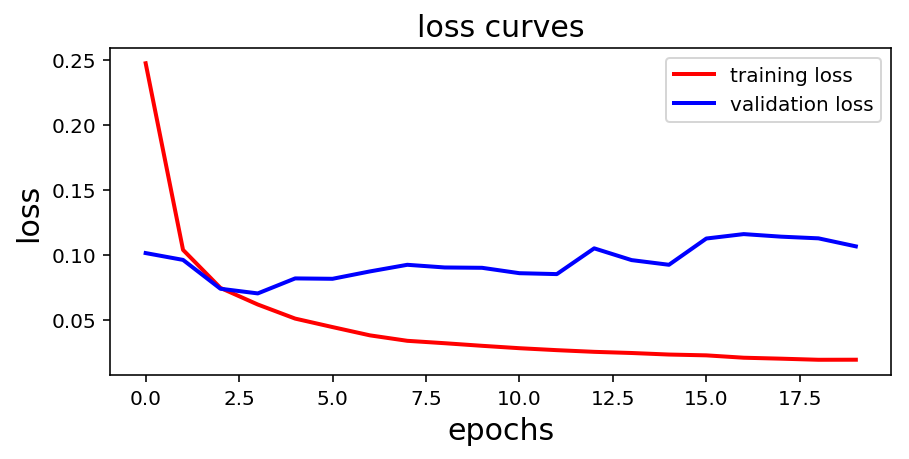

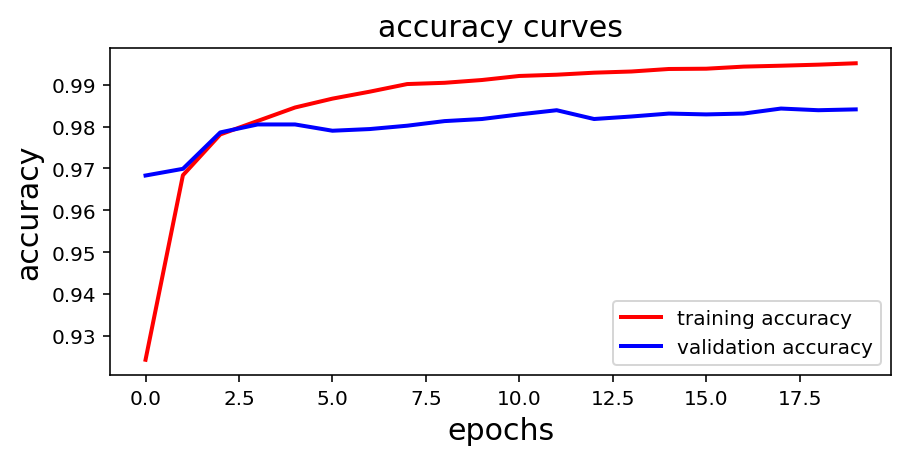

In [17]:
#plot the loss curevs
plt.figure(figsize=[7, 3])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['training loss','validation loss'],fontsize=10)
plt.xlabel('epochs',fontsize=15)
plt.ylabel('loss',fontsize=15)
plt.title('loss curves',fontsize=15)


#plot the accuracy curves
plt.figure(figsize=[7, 3])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=2.0)
plt.legend(['training accuracy','validation accuracy'],fontsize=10)
plt.xlabel('epochs',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.title('accuracy curves',fontsize=15)

# Add Regularization to the model¶

In [21]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(784,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nclasses, activation='softmax'))

model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Check performance after regularization

In [22]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(x_train, y_train, 
                            batch_size=256, epochs=20, verbose=1, 
                            validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.3840 - acc: 0.8806 - val_loss: 0.1532 - val_acc: 0.9523
Epoch 2/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.1716 - acc: 0.9476 - val_loss: 0.1018 - val_acc: 0.9671
Epoch 3/20
60000/60000 [==============================] - 21s 348us/step - loss: 0.1312 - acc: 0.9607 - val_loss: 0.0925 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.1125 - acc: 0.9657 - val_loss: 0.0924 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.0974 - acc: 0.9710 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.0877 - acc: 0.9731 - val_loss: 0.0808 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.0799 - acc: 0.9769 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

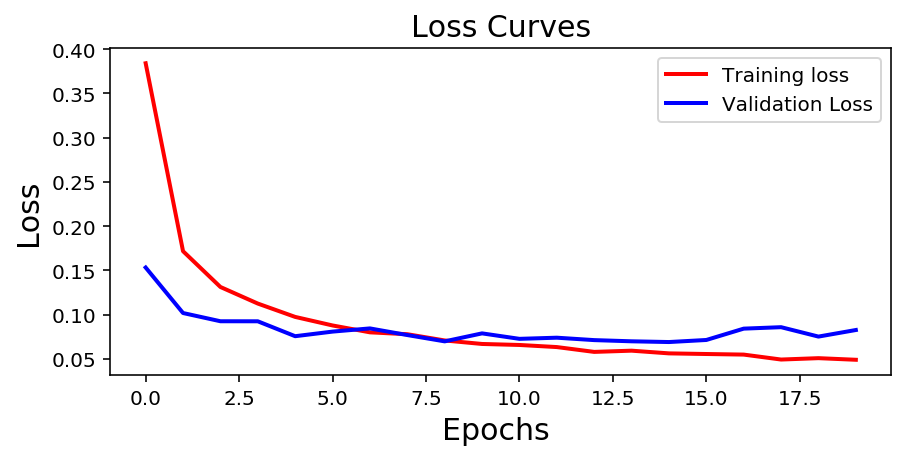

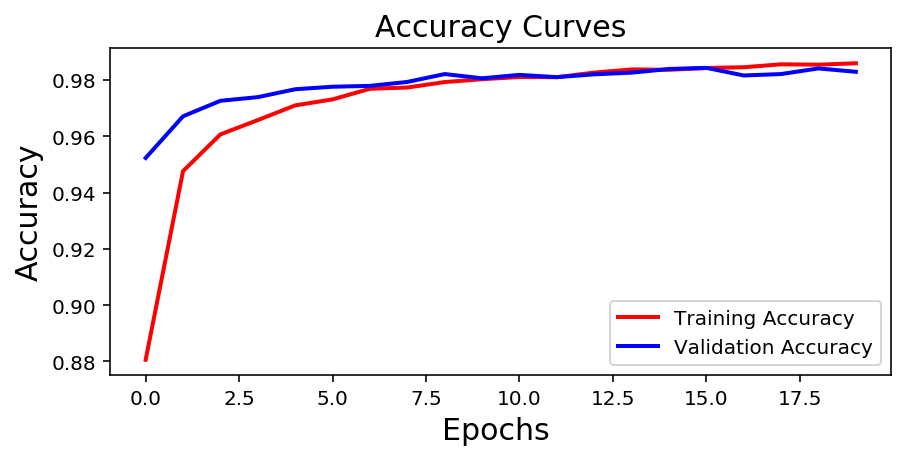

In [23]:
#Plot the Loss Curves
plt.figure(figsize=[7,3])
plt.plot(history_reg.history['loss'],'r',linewidth=2.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)
 
#Plot the Accuracy Curves
plt.figure(figsize=[7,3])
plt.plot(history_reg.history['acc'],'r',linewidth=2.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)

In [25]:
# Predict the most likely class
model_reg.predict_classes(x_test[[8],:])

array([5], dtype=int64)

In [27]:
# Predict the probabilities for each class 
model_reg.predict(x_test[[8],:])

array([[1.1809976e-18, 2.2196119e-20, 7.4780709e-18, 2.4485454e-16,
        8.5295269e-15, 9.9979228e-01, 2.0775331e-04, 3.9081915e-20,
        4.9528776e-10, 2.2903511e-11]], dtype=float32)